In [1]:
#단층퍼셉트론 # 단측퍼셉트론은 은닉층이 존재하지 않는다   입력이랑 출력층만 ( 다층퍼셉트론에서 입력-은닉 or 은닉 - 출력  -1개 로보면 일종의 단층 퍼셉트론)
##    : 출력층의 출력단자/퍼셉트론이 1개인 경우
#    출력층의활성함수가 1개다
#    XOR 이 불가능
#다층퍼셉트론#
#    : 출력층의 출력단자가 2개이상인 경우
#
#입력층의 노드가 n개#
#은닉층의 노드가 m개
#출력층의 노드가 3개
#라면 n,m,3 다층 퍼셉트론이라고 부른다


In [2]:
# 기본
import pandas as pd
import numpy as np

# 서브
from random import randint, uniform  # randint(a,b) a이상b이하에서 정수 '하나'를 뽑는다 유니폼은 소수하나
from scipy.stats import randint, uniform  # 랜덤랜드인트랑 조금 다르다 변수로 랜드인트/유니폼을 선언한 후 변수.rvs(사이즈값)까지 입력을 해야 어레이로 랜덤 값을 반환한다 / uniform(0,1).rvs(1000) 이렇게도 가능 0~1사이의 소수를 1000개 뽑는다

# 데이터 
from sklearn.model_selection import train_test_split   #데이터분할

# 데이터 정규화
from sklearn.preprocessing import MinMaxScaler # 정규화
from sklearn.preprocessing import StandardScaler  # 정규화 (제트스코어) 
from scipy.special import softmax # 소프트맥스 :0~1사이의 값으로 정규화하며 출력한다. 출력 값들의 총합은 항상 1이 되는 특성을 가졌다

# 데이터 분석
from scipy.special import expit  # 결정함수를 받아서 원소별 1값의 확률을 계산한다

# 시각화
import matplotlib.pyplot as plt   # 점그래프, 선그래프
import seaborn as sns  # 시본: 종합그래프
from sklearn.tree import plot_tree # 결정트리 선언,핏 후 plot_tree(결정트리변수) plt.figur(figsize=(숫자,숫자)) plt.show() 로 결정트리를 시각화 한다

# 모델
from sklearn.linear_model import  LogisticRegression, LinearRegression, Lasso,  Ridge   # 선형회귀 모델
from sklearn.linear_model import SGDRegressor, SGDClassifier  # 선형회귀 모델
from sklearn.neighbors import KNeighborsClassifier  # K 이웃 알고리즘 , 뉴데이터와 근접한 다른 밸류들을 찾아서 y를 예측하는 모델
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor # 결정트리 모델
from sklearn.ensemble import RandomForestClassifier # 베깅(의사결정트리) 결정트리 모델, 기존 결정트리의 단점을 보완하고 장점은 그대로 가져간다, 의
from sklearn.naive_bayes import GaussianNB # 분류

# 앙상블
from sklearn.ensemble import VotingClassifier

# 파라미터 최적화
from sklearn.model_selection import GridSearchCV # 모델을 검사해서 최적의 파라미터 값을 찾을 수 있게 도와준다
from sklearn.model_selection import RandomizedSearchCV # 최적파라미터찾기, 모든 경우를 연산하는 그리드서치와는 다르게 라이트하게 작동하는 것이 특징

# 모델 평가
from sklearn.metrics import mean_squared_error,  mean_absolute_error,   r2_score  # 회귀모델의 평가지표 -  ( 실y값, 모델의예측y)
from sklearn.model_selection import cross_validate # 변수 = cross_validate(모델,x_data,y_data) # 트레인+벨리데이션 셋을 스스로 여러번 나눠서 교차검증한다

# 혼돈 매트릭스
from sklearn.metrics import confusion_matrix  # 혼돈매트릭스
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score #혼돈매트릭스 성능평가

#
import sklearn
import sklearn.preprocessing
from sklearn.metrics import *
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
#
#
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.losses import sparse_categorical_crossentropy , categorical_crossentropy, binary_crossentropy
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense 


In [3]:
# 불러오기 

In [4]:
# 필기체 인식 데이터 mnist
# 모양이정해진데이터니까 그모양대로받기
(x_data,y_data), (tt_x,tt_y) = keras.datasets.mnist.load_data()

In [5]:
x_data.shape ,y_data.shape, tt_x.shape,tt_y.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [6]:
# 데이터 전처리

In [7]:
x_data=x_data/255.0 #전처리
tt_x=tt_x/255.0
x_data.shape ,y_data.shape, tt_x.shape,tt_y.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [8]:
t_x,v_x,t_y,v_y=train_test_split(x_data,y_data,random_state=42,test_size=0.2)
#스플릿
t_x.shape, v_x.shape, t_y.shape, v_y.shape, tt_x.shape,tt_y.shape

((48000, 28, 28),
 (12000, 28, 28),
 (48000,),
 (12000,),
 (10000, 28, 28),
 (10000,))

In [9]:
# 모델 생성 및 학습

In [10]:
from tensorflow.keras.layers import Flatten  #입력층 -  뉴런화시킨다 픽처사이즈로 키워준다  벡터사이즈로 안바꿔도 자동으로 바뀐다
from tensorflow.keras.layers import Dropout

model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(100,activation='relu')) 
model.add(Dropout(0.3))
model.add(Dense(10,activation='softmax'))
model.summary()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [11]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from gc import callbacks
ck_p=ModelCheckpoint('best_m.h5')
es=EarlyStopping(patience=2,restore_best_weights=True)
hy=model.fit(t_x,t_y,epochs=100,validation_data=(v_x,v_y),callbacks=[ck_p,es])

Epoch 1/100
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3788 - accuracy: 0.8893 - val_loss: 0.1777 - val_accuracy: 0.9498
Epoch 2/100
1500/1500 [==============================] - 10s 6ms/step - loss: 0.1971 - accuracy: 0.9424 - val_loss: 0.1328 - val_accuracy: 0.9608
Epoch 3/100
1500/1500 [==============================] - 13s 9ms/step - loss: 0.1573 - accuracy: 0.9528 - val_loss: 0.1151 - val_accuracy: 0.9653
Epoch 4/100
1500/1500 [==============================] - 13s 9ms/step - loss: 0.1299 - accuracy: 0.9607 - val_loss: 0.1030 - val_accuracy: 0.9682
Epoch 5/100
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1182 - accuracy: 0.9639 - val_loss: 0.0943 - val_accuracy: 0.9709
Epoch 6/100
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1073 - accuracy: 0.9658 - val_loss: 0.0868 - val_accuracy: 0.9732
Epoch 7/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0959 - accuracy: 0.9698 - val_loss: 0.0845 - v

In [12]:
es.stopped_epoch

8

In [13]:
# 테스트 및 검증

In [14]:
model.evaluate(t_x,t_y),model.evaluate(tt_x,tt_y),model.evaluate(v_x,v_y)

375/375 [==============================] - 1s 2ms/step - loss: 0.0845 - accuracy: 0.9737


([0.045056577771902084, 0.9865624904632568],
 [0.08443808555603027, 0.9743000268936157],
 [0.08453988283872604, 0.9737499952316284])

In [15]:
from tensorflow.keras.models import load_model
m2 = load_model('best_m.h5')
m2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [16]:

len(m2.weights)
#아래랑가틈

4

In [17]:
np.array(m2.weights).shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


(4,)

In [18]:
m2.weights[0]


<tf.Variable 'dense/kernel:0' shape=(784, 100) dtype=float32, numpy=
array([[ 0.00810477, -0.0473182 , -0.06551418, ..., -0.04626296,
         0.066019  ,  0.03313906],
       [ 0.02205577,  0.01787707,  0.01706485, ..., -0.07513572,
        -0.05330635,  0.0413653 ],
       [-0.04059555,  0.05060981,  0.05835013, ...,  0.04584378,
         0.06926265, -0.04645241],
       ...,
       [-0.06495856, -0.05200779,  0.06849505, ..., -0.03636554,
        -0.05587335, -0.02232324],
       [ 0.01255681,  0.06100065,  0.0040435 , ...,  0.0778707 ,
        -0.00622366,  0.04145682],
       [ 0.03785817,  0.02917566, -0.00077993, ..., -0.0499252 ,
        -0.01683423,  0.02674895]], dtype=float32)>

In [19]:
m2.weights[1]


<tf.Variable 'dense/bias:0' shape=(100,) dtype=float32, numpy=
array([-0.10087726,  0.16981928, -0.02316268, -0.13199173,  0.15675032,
        0.08230904,  0.05716974,  0.08552306, -0.06373902, -0.268013  ,
        0.26622447, -0.01681501, -0.31104106,  0.01763551, -0.05496079,
        0.2363962 , -0.0942196 ,  0.02393967,  0.04480096, -0.06156958,
        0.04709601, -0.02261844,  0.28462958, -0.0017031 ,  0.13000953,
       -0.14024012,  0.0020429 ,  0.21839727,  0.15245321, -0.0277488 ,
       -0.14143477, -0.19952409, -0.05414734,  0.1944347 , -0.09606422,
       -0.05639265, -0.24456902, -0.10335226, -0.01468734,  0.20505027,
       -0.11866765,  0.0820215 , -0.22037481, -0.03246978, -0.09437842,
       -0.01225858,  0.18046452, -0.15486813, -0.13794807,  0.12958816,
        0.05589566,  0.13160278,  0.07324322, -0.01867862,  0.06854951,
       -0.17178947, -0.32468936,  0.16259268,  0.10036666,  0.1364669 ,
        0.0717698 , -0.03751065,  0.28485867,  0.2310563 ,  0.24579507,
 

In [20]:
m2.weights[2]


<tf.Variable 'dense_1/kernel:0' shape=(100, 10) dtype=float32, numpy=
array([[-6.22205555e-01, -1.42642677e-01, -3.14749062e-01,
         3.93534809e-01, -2.33480364e-01,  4.10827637e-01,
        -7.28390634e-01, -4.59852606e-01, -3.72616619e-01,
         1.79043546e-01],
       [-4.40888792e-01, -2.99931634e-02, -2.85349578e-01,
        -7.23990917e-01, -8.24905574e-01,  5.80613315e-01,
         4.49716598e-01, -4.47255284e-01, -2.68709171e-03,
         9.89867970e-02],
       [-2.65931219e-01,  2.32086107e-01,  4.48749632e-01,
         4.08650190e-01, -3.29605728e-01, -5.44268072e-01,
        -1.55335426e-01,  4.41723108e-01, -2.28723735e-01,
        -1.08479404e+00],
       [ 2.83468068e-01,  2.04936534e-01,  2.03115568e-01,
         1.47149861e-01, -8.11020195e-01, -2.90013582e-01,
        -6.15215242e-01,  1.67650938e-01,  1.37305185e-01,
         1.36439055e-01],
       [ 3.04096073e-01, -1.06452547e-01, -3.02336305e-01,
        -4.32086021e-01, -5.46141863e-01,  2.94288546e-01,


In [21]:
m2.weights[3]  #웨이트쉐입4니까  0부터3까지 4개


<tf.Variable 'dense_1/bias:0' shape=(10,) dtype=float32, numpy=
array([-0.0726281 ,  0.13991648, -0.20140603, -0.25895223,  0.14751193,
       -0.19190246, -0.03075694, -0.05453959,  0.4010151 ,  0.06825164],
      dtype=float32)>

In [22]:
m2.predict(t_x[:3])>0.5

array([[False, False, False, False, False,  True, False, False, False,
        False],
       [ True, False, False, False, False, False, False, False, False,
        False],
       [False,  True, False, False, False, False, False, False, False,
        False]])

In [23]:
m2.predict(t_x[:3]) > 0.5   #유사도 판별해서 같을 확률계산 50프로 이상이면 참으로 하겟다

array([[False, False, False, False, False,  True, False, False, False,
        False],
       [ True, False, False, False, False, False, False, False, False,
        False],
       [False,  True, False, False, False, False, False, False, False,
        False]])

In [24]:
t_x[0].shape,t_x[:1].shape, #입력받은내용그대로전달해야한다   28,28사이즈의구멍이뚫려잇다 학습햇던방법과똑같이전달

((28, 28), (1, 28, 28))

In [25]:
m2.predict(t_x[:1]) #여기서 합하면 1인 값으로 정규화하는것이 소프트맥스다
#출력의 확률

array([[1.2326624e-20, 3.0730457e-15, 2.0574207e-18, 5.6478626e-08,
        3.1480378e-20, 1.0000000e+00, 6.8395615e-19, 2.1275050e-18,
        2.7808025e-11, 6.6785839e-09]], dtype=float32)

In [26]:
m2.predict(t_x[:1]).shape  #10개의결과인데 고차원이다 저차원아님


(1, 10)

In [27]:
m2.predict(t_x[:1]) > 0.5   #영점오보다크면 트루


array([[False, False, False, False, False,  True, False, False, False,
        False]])

In [28]:
정답=np.array(['숫자0','숫자1','숫자2','숫자3','숫자4','숫자5','숫자6','숫자7','숫자8','숫자9',]) #이건 라벨 데이터
정답[(m2.predict(t_x[:1]) > 0.5)[0]]



array(['숫자5'], dtype='<U3')

In [29]:
정답=np.array(['숫자0','숫자1','숫자2','숫자3','숫자4','숫자5','숫자6','숫자7','숫자8','숫자9',]) #이건 라벨 데이터
print(정답[(m2.predict(t_x[:1]) > 0.5)[0]])



['숫자5']


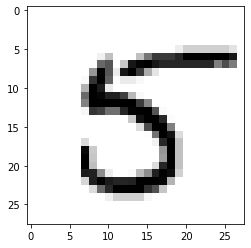

In [30]:
plt.imshow(t_x[0],cmap='gray_r')  #0인덱 한장의 이미지 쇼


In [31]:
def 정답확인(x):
    정답=np.array(['숫자0','숫자1','숫자2','숫자3','숫자4','숫자5','숫자6','숫자7','숫자8','숫자9',]) #이건 라벨 데이터
    for d in x:
        print(정답[(m2.predict(np.array([d]))>0.5)[0]])
        plt.imshow(d,cmap='gray_r')
        plt.show()



['숫자7']


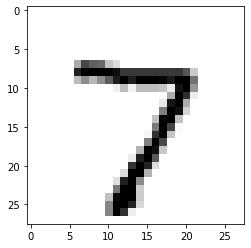

['숫자2']


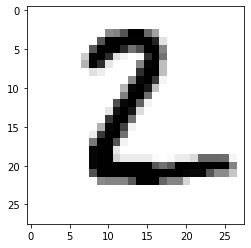

['숫자1']


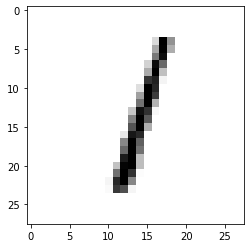

['숫자0']


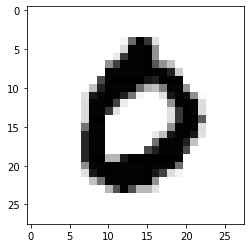

['숫자4']


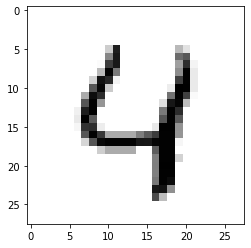

['숫자1']


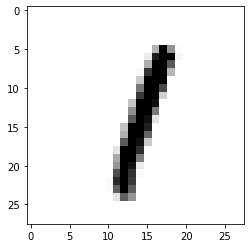

['숫자4']


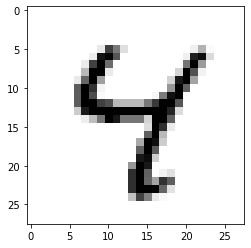

['숫자9']


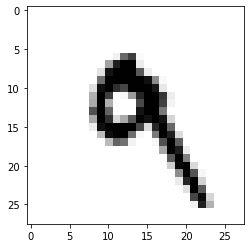

['숫자5']


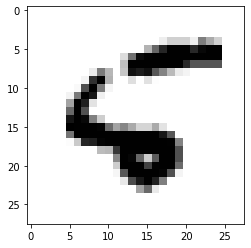

['숫자9']


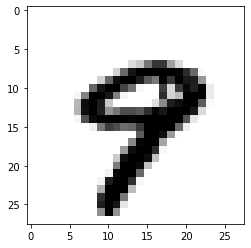

In [32]:
정답확인(tt_x[:10]) #사진열장넣음    #사진분류기완성

In [33]:
#################################

In [34]:
#################################

In [35]:
#################################

In [36]:
#################################

In [37]:
#################################

In [38]:
#################################

In [39]:
#################################

In [40]:
#################################

In [41]:
import seaborn as sns
data=sns.load_dataset('titanic')
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [42]:
#타이타닉데이터로 이진분류기를 만들고 출력 

In [43]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [44]:
# 부르기
# 기본
import pandas as pd
import numpy as np

# 서브
from random import randint, uniform  # randint(a,b) a이상b이하에서 정수 '하나'를 뽑는다 유니폼은 소수하나
from scipy.stats import randint, uniform  # 랜덤랜드인트랑 조금 다르다 변수로 랜드인트/유니폼을 선언한 후 변수.rvs(사이즈값)까지 입력을 해야 어레이로 랜덤 값을 반환한다 / uniform(0,1).rvs(1000) 이렇게도 가능 0~1사이의 소수를 1000개 뽑는다

# 데이터 
from sklearn.model_selection import train_test_split   #데이터분할

# 데이터 정규화
from sklearn.preprocessing import MinMaxScaler # 정규화
from sklearn.preprocessing import StandardScaler  # 정규화 (제트스코어) 
from scipy.special import softmax # 소프트맥스 :0~1사이의 값으로 정규화하며 출력한다. 출력 값들의 총합은 항상 1이 되는 특성을 가졌다

# 데이터 분석
from scipy.special import expit  # 결정함수를 받아서 원소별 1값의 확률을 계산한다

# 시각화
import matplotlib.pyplot as plt   # 점그래프, 선그래프
import seaborn as sns  # 시본: 종합그래프
from sklearn.tree import plot_tree # 결정트리 선언,핏 후 plot_tree(결정트리변수) plt.figur(figsize=(숫자,숫자)) plt.show() 로 결정트리를 시각화 한다

# 모델
from sklearn.linear_model import  LogisticRegression, LinearRegression, Lasso,  Ridge   # 선형회귀 모델
from sklearn.linear_model import SGDRegressor, SGDClassifier  # 선형회귀 모델
from sklearn.neighbors import KNeighborsClassifier  # K 이웃 알고리즘 , 뉴데이터와 근접한 다른 밸류들을 찾아서 y를 예측하는 모델
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor # 결정트리 모델
from sklearn.ensemble import RandomForestClassifier # 베깅(의사결정트리) 결정트리 모델, 기존 결정트리의 단점을 보완하고 장점은 그대로 가져간다, 의
from sklearn.naive_bayes import GaussianNB # 분류

# 앙상블
from sklearn.ensemble import VotingClassifier

# 파라미터 최적화
from sklearn.model_selection import GridSearchCV # 모델을 검사해서 최적의 파라미터 값을 찾을 수 있게 도와준다
from sklearn.model_selection import RandomizedSearchCV # 최적파라미터찾기, 모든 경우를 연산하는 그리드서치와는 다르게 라이트하게 작동하는 것이 특징

# 모델 평가
from sklearn.metrics import mean_squared_error,  mean_absolute_error,   r2_score  # 회귀모델의 평가지표 -  ( 실y값, 모델의예측y)
from sklearn.model_selection import cross_validate # 변수 = cross_validate(모델,x_data,y_data) # 트레인+벨리데이션 셋을 스스로 여러번 나눠서 교차검증한다

# 혼돈 매트릭스
from sklearn.metrics import confusion_matrix  # 혼돈매트릭스
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score #혼돈매트릭스 성능평가

#
import sklearn
import sklearn.preprocessing
from sklearn.metrics import *
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
#

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.losses import sparse_categorical_crossentropy , categorical_crossentropy, binary_crossentropy
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import Flatten  #입력층 -  뉴런화시킨다 픽처사이즈로 키워준다  벡터사이즈로 안바꿔도 자동으로 바뀐다
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import load_model


In [45]:
#전처리
# 행렬 확인
data.shape
#전체데이터

(891, 15)

In [46]:
train=data

In [47]:
train

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [48]:
train.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [49]:
#덱날리기
train = train.drop(columns='deck')

In [50]:
train

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [51]:
# 결척지
train.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

In [52]:
train = train.drop(columns='age')
train
#결측처리완료 타운결측2개임박두개 냅둠

,survived,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [53]:
# 에이지 시리ㅡㅈ 드랍
train.isnull().sum()

survived       0
pclass         0
sex            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [54]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
train['sex'] = encoder.fit_transform(train['sex']).reshape(-1,1)
train['embarked'] = encoder.fit_transform(train['embarked']).reshape(-1,1)
train['class'] = encoder.fit_transform(train['class']).reshape(-1,1)
train['who'] = encoder.fit_transform(train['who']).reshape(-1,1)
train['adult_male'] = encoder.fit_transform(train['adult_male']).reshape(-1,1)
train['embark_town'] = encoder.fit_transform(train['embark_town']).reshape(-1,1)
train['alone'] = encoder.fit_transform(train['alone']).reshape(-1,1)

train


,survived,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,1,0,7.2500,2,2,1,1,2,no,0
1,1,1,0,1,0,71.2833,0,0,2,0,0,yes,0
2,1,3,0,0,0,7.9250,2,2,2,0,2,yes,1
3,1,1,0,1,0,53.1000,2,0,2,0,2,yes,0
4,0,3,1,0,0,8.0500,2,2,1,1,2,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,0,0,13.0000,2,1,1,1,2,no,1
887,1,1,0,0,0,30.0000,2,0,2,0,2,yes,1
888,0,3,0,1,2,23.4500,2,2,2,0,2,no,0
889,1,1,1,0,0,30.0000,0,0,1,1,0,yes,1


In [55]:
for i in range(len(train.columns)):
        print(i,np.unique(train[train.columns[i]]), end='\n\n')

0 [0 1]

1 [1 2 3]

2 [0 1]

3 [0 1 2 3 4 5 8]

4 [0 1 2 3 4 5 6]

5 [  0.       4.0125   5.       6.2375   6.4375   6.45     6.4958   6.75
   6.8583   6.95     6.975    7.0458   7.05     7.0542   7.125    7.1417
   7.225    7.2292   7.25     7.3125   7.4958   7.5208   7.55     7.6292
   7.65     7.725    7.7292   7.7333   7.7375   7.7417   7.75     7.775
   7.7875   7.7958   7.8      7.8292   7.8542   7.875    7.8792   7.8875
   7.8958   7.925    8.0292   8.05     8.1125   8.1375   8.1583   8.3
   8.3625   8.4042   8.4333   8.4583   8.5167   8.6542   8.6625   8.6833
   8.7125   8.85     9.       9.2167   9.225    9.35     9.475    9.4833
   9.5      9.5875   9.825    9.8375   9.8417   9.8458  10.1708  10.4625
  10.5     10.5167  11.1333  11.2417  11.5     12.      12.275   12.2875
  12.35    12.475   12.525   12.65    12.875   13.      13.4167  13.5
  13.7917  13.8583  13.8625  14.      14.1083  14.4     14.4542  14.4583
  14.5     15.      15.0458  15.05    15.1     15.2458  15.5    

In [56]:
train.isnull().sum()

survived       0
pclass         0
sex            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [57]:
train['alive'] = encoder.fit_transform(train['alive']).reshape(-1,1)

train

,survived,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,1,0,7.2500,2,2,1,1,2,0,0
1,1,1,0,1,0,71.2833,0,0,2,0,0,1,0
2,1,3,0,0,0,7.9250,2,2,2,0,2,1,1
3,1,1,0,1,0,53.1000,2,0,2,0,2,1,0
4,0,3,1,0,0,8.0500,2,2,1,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,0,0,13.0000,2,1,1,1,2,0,1
887,1,1,0,0,0,30.0000,2,0,2,0,2,1,1
888,0,3,0,1,2,23.4500,2,2,2,0,2,0,0
889,1,1,1,0,0,30.0000,0,0,1,1,0,1,1


In [58]:
for i in range(len(train.columns)):
        print(i,np.unique(train[train.columns[i]]), end='\n\n')

0 [0 1]

1 [1 2 3]

2 [0 1]

3 [0 1 2 3 4 5 8]

4 [0 1 2 3 4 5 6]

5 [  0.       4.0125   5.       6.2375   6.4375   6.45     6.4958   6.75
   6.8583   6.95     6.975    7.0458   7.05     7.0542   7.125    7.1417
   7.225    7.2292   7.25     7.3125   7.4958   7.5208   7.55     7.6292
   7.65     7.725    7.7292   7.7333   7.7375   7.7417   7.75     7.775
   7.7875   7.7958   7.8      7.8292   7.8542   7.875    7.8792   7.8875
   7.8958   7.925    8.0292   8.05     8.1125   8.1375   8.1583   8.3
   8.3625   8.4042   8.4333   8.4583   8.5167   8.6542   8.6625   8.6833
   8.7125   8.85     9.       9.2167   9.225    9.35     9.475    9.4833
   9.5      9.5875   9.825    9.8375   9.8417   9.8458  10.1708  10.4625
  10.5     10.5167  11.1333  11.2417  11.5     12.      12.275   12.2875
  12.35    12.475   12.525   12.65    12.875   13.      13.4167  13.5
  13.7917  13.8583  13.8625  14.      14.1083  14.4     14.4542  14.4583
  14.5     15.      15.0458  15.05    15.1     15.2458  15.5    

In [59]:
train.isnull().sum()

survived       0
pclass         0
sex            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [60]:
# 범위 설정 해야하는 시리즈 찾기
# 5 인덱만 범위설정
for i in range(len(train.columns)):
        print(i,np.unique(train[train.columns[i]]), end='\n\n')

0 [0 1]

1 [1 2 3]

2 [0 1]

3 [0 1 2 3 4 5 8]

4 [0 1 2 3 4 5 6]

5 [  0.       4.0125   5.       6.2375   6.4375   6.45     6.4958   6.75
   6.8583   6.95     6.975    7.0458   7.05     7.0542   7.125    7.1417
   7.225    7.2292   7.25     7.3125   7.4958   7.5208   7.55     7.6292
   7.65     7.725    7.7292   7.7333   7.7375   7.7417   7.75     7.775
   7.7875   7.7958   7.8      7.8292   7.8542   7.875    7.8792   7.8875
   7.8958   7.925    8.0292   8.05     8.1125   8.1375   8.1583   8.3
   8.3625   8.4042   8.4333   8.4583   8.5167   8.6542   8.6625   8.6833
   8.7125   8.85     9.       9.2167   9.225    9.35     9.475    9.4833
   9.5      9.5875   9.825    9.8375   9.8417   9.8458  10.1708  10.4625
  10.5     10.5167  11.1333  11.2417  11.5     12.      12.275   12.2875
  12.35    12.475   12.525   12.65    12.875   13.      13.4167  13.5
  13.7917  13.8583  13.8625  14.      14.1083  14.4     14.4542  14.4583
  14.5     15.      15.0458  15.05    15.1     15.2458  15.5    

In [62]:
bins = [-1, 103,  206 , 309 , 412, 515  ] #  #주의  # 범위숫자에 걸리면 Nan값이 된다 # 범위 설정  5칸으루나눌려면 6개범위숫자
ck_data = [0,1,2,3,4] # 범위별 이름 (라벨)  #범위설정 len보다 1작게
c_data = pd.cut(train['fare'],bins=bins, labels = ck_data)
train['fare'] = c_data
c_data, train, np.unique(train['fare'])

(0      0
 1      0
 2      0
 3      0
 4      0
       ..
 886    0
 887    0
 888    0
 889    0
 890    0
 Name: fare, Length: 891, dtype: category
 Categories (5, int64): [0 < 1 < 2 < 3 < 4],
      survived  pclass  sex  sibsp  parch fare  embarked  class  who  \
 0           0       3    1      1      0    0         2      2    1   
 1           1       1    0      1      0    0         0      0    2   
 2           1       3    0      0      0    0         2      2    2   
 3           1       1    0      1      0    0         2      0    2   
 4           0       3    1      0      0    0         2      2    1   
 ..        ...     ...  ...    ...    ...  ...       ...    ...  ...   
 886         0       2    1      0      0    0         2      1    1   
 887         1       1    0      0      0    0         2      0    2   
 888         0       3    0      1      2    0         2      2    2   
 889         1       1    1      0      0    0         0      0    1   
 890       

In [63]:
train

,survived,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,1,0,0,2,2,1,1,2,0,0
1,1,1,0,1,0,0,0,0,2,0,0,1,0
2,1,3,0,0,0,0,2,2,2,0,2,1,1
3,1,1,0,1,0,0,2,0,2,0,2,1,0
4,0,3,1,0,0,0,2,2,1,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,0,0,0,2,1,1,1,2,0,1
887,1,1,0,0,0,0,2,0,2,0,2,1,1
888,0,3,0,1,2,0,2,2,2,0,2,0,0
889,1,1,1,0,0,0,0,0,1,1,0,1,1


In [64]:
for i in range(len(train.columns)):
        print(i,np.unique(train[train.columns[i]]), end='\n\n')

0 [0 1]

1 [1 2 3]

2 [0 1]

3 [0 1 2 3 4 5 8]

4 [0 1 2 3 4 5 6]

5 [0 1 2 4]

6 [0 1 2 3]

7 [0 1 2]

8 [0 1 2]

9 [0 1]

10 [0 1 2 3]

11 [0 1]

12 [0 1]



In [65]:
train.isnull().sum()

survived       0
pclass         0
sex            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [66]:
# 스플릿 하기
train_x = train[['pclass'	,'sex'	,'sibsp'	,'parch'	,'fare'	,'embarked',	'class',	'who',	'adult_male'	,'embark_town'	,'alive'	,'alone']]
train_y = train['survived']

In [67]:
train_x.shape, train_y.shape

((891, 12), (891,))

In [68]:
from sklearn.model_selection import train_test_split
t_x, tt_x,   t_y,  tt_y   =  train_test_split(train_x, train_y, random_state=42,stratify=train_y,test_size=0.3)
t_x.shape, tt_x.shape,   t_y.shape,  tt_y.shape

((623, 12), (268, 12), (623,), (268,))

In [70]:
np.unique(train_y)

array([0, 1])

In [71]:
# 정규화 >  모델 > 파라미터최적화 > result
t_x.shape, tt_x.shape,   t_y.shape,  tt_y.shape

((623, 12), (268, 12), (623,), (268,))

In [72]:
#정규화
# 정규화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
t_x = scaler.fit_transform(t_x)
tt_x = scaler.fit(t_x).transform(tt_x)
t_x.shape, tt_x.shape,   t_y.shape,  tt_y.shape

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


((623, 12), (268, 12), (623,), (268,))

In [ ]:
#모델

In [73]:
from sklearn.ensemble import RandomForestClassifier # 결정트리 모델, 기존 결정트리의 업그레이드 버전
rfc = RandomForestClassifier(random_state=42,oob_score=True) # 랜덤스태이트가 필수  (n_estimator=트리의 수)
rfc.fit(t_x, t_y)

RandomForestClassifier(oob_score=True, random_state=42)

In [74]:
rfc.score(t_x,t_y), rfc.score(tt_x,tt_y)  # 성능확인

(1.0, 1.0)

In [ ]:
#하이퍼매개변수
from scipy.stats import randint, uniform  # 랜덤랜드인트랑 조금 다르다 변수로 랜드인트/유니폼을 선언한 후 변수.rvs(사이즈값)까지 입력을 해야 어레이로 랜덤 값을 반환한다 / uniform(0,1).rvs(1000) 이렇게도 가능 0~1사이의 소수를 1000개 뽑는다
from sklearn.model_selection import RandomizedSearchCV  # GridSearch 와 동일한 방식으로 사용하지만 모든 조합을 다 시도하지는 않고, 각 반복마다 임의의 값만 대입해 지정한 횟수만큼 평가함
rscv = RandomizedSearchCV ( RandomForestClassifier(random_state=42) , params , n_iter=100 , random_state=42) # 모든 경우를 연산하는 헤비한 그리드서치에 비해 라이트하다
params={'min_impurity_decrease':uniform(0.0001,0.001), 
         'max_depth':randint(5,100),  # 파라미터 랜덤으로 주기
        'min_samples_split':randint(2,25),
        'min_samples_leaf':randint(1,25)}

In [ ]:
rscv.fit(t_x,t_y)

In [ ]:
t_x.shape, tt_x.shape,   t_y.shape,  tt_y.shape

In [ ]:

rscv.best_params_ # 최적이 파라미터 , 맥스뎁 ,민샘플립, 민샘플스플릿 정보  
# 최적의 파라미터 값 찾기

In [ ]:
max_rscv = rscv.best_estimator_ # 최적의 파라미터 값이 작동하는 모델이 완성 > 최적의 파라미터값을 볼 수 있고 새 변수에 넣거나 score(x,y) 로 성능을 확인

In [ ]:
max_rscv.score(t_x,t_y), max_rscv.score(tt_x,tt_y)

In [ ]:
max_rscv.predict(?).shape

In [ ]:
result = max_rscv.predict(?)

In [ ]:
#저장
#submission['income']= result
#submission.to_csv('result.csv',index=False)
#submission.head()

In [76]:
import seaborn as sns

In [78]:
data=sns.load_dataset('iris')
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [79]:
#결측치확인
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [114]:
# 기본
import pandas as pd
import numpy as np

# 서브
from random import randint, uniform  # randint(a,b) a이상b이하에서 정수 '하나'를 뽑는다 유니폼은 소수하나
from scipy.stats import randint, uniform  # 랜덤랜드인트랑 조금 다르다 변수로 랜드인트/유니폼을 선언한 후 변수.rvs(사이즈값)까지 입력을 해야 어레이로 랜덤 값을 반환한다 / uniform(0,1).rvs(1000) 이렇게도 가능 0~1사이의 소수를 1000개 뽑는다

# 데이터 
from sklearn.model_selection import train_test_split   #데이터분할

# 데이터 정규화
from sklearn.preprocessing import MinMaxScaler # 정규화
from sklearn.preprocessing import StandardScaler  # 정규화 (제트스코어) 
from scipy.special import softmax # 소프트맥스 :0~1사이의 값으로 정규화하며 출력한다. 출력 값들의 총합은 항상 1이 되는 특성을 가졌다

# 데이터 분석
from scipy.special import expit  # 결정함수를 받아서 원소별 1값의 확률을 계산한다

# 시각화
import matplotlib.pyplot as plt   # 점그래프, 선그래프
import seaborn as sns  # 시본: 종합그래프
from sklearn.tree import plot_tree # 결정트리 선언,핏 후 plot_tree(결정트리변수) plt.figur(figsize=(숫자,숫자)) plt.show() 로 결정트리를 시각화 한다

# 모델
from sklearn.linear_model import  LogisticRegression, LinearRegression, Lasso,  Ridge   # 선형회귀 모델
from sklearn.linear_model import SGDRegressor, SGDClassifier  # 선형회귀 모델
from sklearn.neighbors import KNeighborsClassifier  # K 이웃 알고리즘 , 뉴데이터와 근접한 다른 밸류들을 찾아서 y를 예측하는 모델
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor # 결정트리 모델
from sklearn.ensemble import RandomForestClassifier # 베깅(의사결정트리) 결정트리 모델, 기존 결정트리의 단점을 보완하고 장점은 그대로 가져간다, 의
from sklearn.naive_bayes import GaussianNB # 분류

# 앙상블
from sklearn.ensemble import VotingClassifier

# 파라미터 최적화
from sklearn.model_selection import GridSearchCV # 모델을 검사해서 최적의 파라미터 값을 찾을 수 있게 도와준다
from sklearn.model_selection import RandomizedSearchCV # 최적파라미터찾기, 모든 경우를 연산하는 그리드서치와는 다르게 라이트하게 작동하는 것이 특징

# 모델 평가
from sklearn.metrics import mean_squared_error,  mean_absolute_error,   r2_score  # 회귀모델의 평가지표 -  ( 실y값, 모델의예측y)
from sklearn.model_selection import cross_validate # 변수 = cross_validate(모델,x_data,y_data) # 트레인+벨리데이션 셋을 스스로 여러번 나눠서 교차검증한다

# 혼돈 매트릭스
from sklearn.metrics import confusion_matrix  # 혼돈매트릭스
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score #혼돈매트릭스 성능평가

#
import sklearn
import sklearn.preprocessing
from sklearn.metrics import *
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
#

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.losses import sparse_categorical_crossentropy , categorical_crossentropy, binary_crossentropy
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import Flatten  #입력층 -  뉴런화시킨다 픽처사이즈로 키워준다  벡터사이즈로 안바꿔도 자동으로 바뀐다
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import load_model

In [115]:
data=sns.load_dataset('iris')
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [116]:

from sklearn.preprocessing import LabelEncoder

X=data[['sepal_length'	,'sepal_width'	,'petal_length'	,'petal_width','species']]
y=data['species']

X.shape, y.shape

((150, 5), (150,))

In [117]:
n_y = LabelEncoder().fit_transform(y)

In [118]:
n_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# X 랑 n_y 어레이

In [119]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [120]:
m=Sequential()
m.add(Flatten(input_shape=(4,)))  # 4  픽처수로
m.add(Dense(8, activation='relu'))
m.add(Dense(3, activation='softmax'))  #아웃풋 수 3개   유니크로 엔 와이 확인
m.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 4)                 0         
                                                                 
 dense_4 (Dense)             (None, 8)                 40        
                                                                 
 dense_5 (Dense)             (None, 3)                 27        
                                                                 
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


In [121]:
m.compile( loss = 'sparse_categorical_crossentropy', metrics='acc') #아큐러시

In [122]:
# 트레인, 밸리데이션, 테스트 셋 나누기
from sklearn.model_selection import train_test_split
t_x , v_x , t_y , v_y = train_test_split(X,n_y,random_state=42,stratify=y,test_size=0.2)



SyntaxError: ignored

In [123]:
m.fit(t_x,t_y, epochs=5, validation_data=(v_x,v_y))

ValueError: ignored

In [113]:
m.predict(t_x[:10])<0.5



ValueError: ignored

In [126]:
# 기본
import pandas as pd
import numpy as np

# 서브
from random import randint, uniform  # randint(a,b) a이상b이하에서 정수 '하나'를 뽑는다 유니폼은 소수하나
from scipy.stats import randint, uniform  # 랜덤랜드인트랑 조금 다르다 변수로 랜드인트/유니폼을 선언한 후 변수.rvs(사이즈값)까지 입력을 해야 어레이로 랜덤 값을 반환한다 / uniform(0,1).rvs(1000) 이렇게도 가능 0~1사이의 소수를 1000개 뽑는다

# 데이터 
from sklearn.model_selection import train_test_split   #데이터분할

# 데이터 정규화
from sklearn.preprocessing import MinMaxScaler # 정규화
from sklearn.preprocessing import StandardScaler  # 정규화 (제트스코어) 
from scipy.special import softmax # 소프트맥스 :0~1사이의 값으로 정규화하며 출력한다. 출력 값들의 총합은 항상 1이 되는 특성을 가졌다

# 데이터 분석
from scipy.special import expit  # 결정함수를 받아서 원소별 1값의 확률을 계산한다

# 시각화
import matplotlib.pyplot as plt   # 점그래프, 선그래프
import seaborn as sns  # 시본: 종합그래프
from sklearn.tree import plot_tree # 결정트리 선언,핏 후 plot_tree(결정트리변수) plt.figur(figsize=(숫자,숫자)) plt.show() 로 결정트리를 시각화 한다

# 모델
from sklearn.linear_model import  LogisticRegression, LinearRegression, Lasso,  Ridge   # 선형회귀 모델
from sklearn.linear_model import SGDRegressor, SGDClassifier  # 선형회귀 모델
from sklearn.neighbors import KNeighborsClassifier  # K 이웃 알고리즘 , 뉴데이터와 근접한 다른 밸류들을 찾아서 y를 예측하는 모델
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor # 결정트리 모델
from sklearn.ensemble import RandomForestClassifier # 베깅(의사결정트리) 결정트리 모델, 기존 결정트리의 단점을 보완하고 장점은 그대로 가져간다, 의
from sklearn.naive_bayes import GaussianNB # 분류

# 앙상블
from sklearn.ensemble import VotingClassifier

# 파라미터 최적화
from sklearn.model_selection import GridSearchCV # 모델을 검사해서 최적의 파라미터 값을 찾을 수 있게 도와준다
from sklearn.model_selection import RandomizedSearchCV # 최적파라미터찾기, 모든 경우를 연산하는 그리드서치와는 다르게 라이트하게 작동하는 것이 특징

# 모델 평가
from sklearn.metrics import mean_squared_error,  mean_absolute_error,   r2_score  # 회귀모델의 평가지표 -  ( 실y값, 모델의예측y)
from sklearn.model_selection import cross_validate # 변수 = cross_validate(모델,x_data,y_data) # 트레인+벨리데이션 셋을 스스로 여러번 나눠서 교차검증한다

# 혼돈 매트릭스
from sklearn.metrics import confusion_matrix  # 혼돈매트릭스
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score #혼돈매트릭스 성능평가

#
import sklearn
import sklearn.preprocessing
from sklearn.metrics import *
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
#

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import SGD , RMSprop, Adam 
from tensorflow.keras.losses import sparse_categorical_crossentropy , categorical_crossentropy, binary_crossentropy
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import Flatten  #입력층 -  뉴런화시킨다 픽처사이즈로 키워준다  벡터사이즈로 안바꿔도 자동으로 바뀐다
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.datasets import boston_housing #보스턴데이터 회귀문제)


In [128]:
(X_data,y_data),(tt_x,tt_y)=boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [129]:
X_data.shape, y_data.shape

((404, 13), (404,))

In [130]:
np.unique(y_data)

array([ 5. ,  6.3,  7. ,  7.2,  7.5,  8.3,  8.4,  8.5,  8.7,  8.8,  9.6,
       10.2, 10.4, 10.5, 10.8, 10.9, 11. , 11.3, 11.5, 11.7, 11.8, 11.9,
       12.1, 12.3, 12.5, 12.6, 12.7, 12.8, 13.1, 13.2, 13.3, 13.4, 13.5,
       13.6, 13.8, 13.9, 14. , 14.1, 14.2, 14.3, 14.4, 14.5, 14.6, 14.8,
       14.9, 15. , 15.1, 15.2, 15.3, 15.6, 15.7, 16. , 16.1, 16.2, 16.3,
       16.4, 16.5, 16.6, 16.7, 16.8, 17. , 17.1, 17.2, 17.3, 17.4, 17.5,
       17.7, 17.8, 17.9, 18. , 18.1, 18.2, 18.3, 18.4, 18.5, 18.7, 18.8,
       18.9, 19. , 19.1, 19.2, 19.3, 19.4, 19.5, 19.6, 19.7, 19.8, 19.9,
       20. , 20.1, 20.2, 20.3, 20.4, 20.5, 20.6, 20.7, 20.8, 21. , 21.1,
       21.2, 21.4, 21.6, 21.7, 21.8, 21.9, 22. , 22.1, 22.2, 22.3, 22.4,
       22.5, 22.6, 22.7, 22.8, 22.9, 23. , 23.1, 23.2, 23.3, 23.4, 23.5,
       23.6, 23.7, 23.8, 23.9, 24. , 24.1, 24.3, 24.4, 24.5, 24.6, 24.7,
       24.8, 25. , 25.1, 25.2, 25.3, 26.2, 26.4, 26.5, 26.6, 27.1, 27.5,
       27.9, 28. , 28.2, 28.5, 28.6, 28.7, 29. , 29

In [131]:
t_x,v_x,t_y,v_y=train_test_split(x_data,y_data,random_state=42,test_size=0.2)
#스플릿
t_x.shape, v_x.shape, t_y.shape, v_y.shape, tt_x.shape,tt_y.shape

ValueError: ignored

In [132]:
m = Sequential()
m.add(Dense(50,  input_shape=(13,),activation='relu'))  #인풋은 말그대로 인풋 픽처의 수를 입력해야 한다
m.add(Dense(1))   #엑티베이션은 다음 층으로 전달하기 위한 함수 즉 출력층에는 엑티베이션 없다  '회귀' 문제 에서는
m.summary()     # 분류문제는 출력 액티베이션도 필요하다    이진분류 시그모이드 다중분류 소프트맥스
                     # 회귀문제는 출력 엑티베이션 뺴야한다
                    # 회귀는 선만 따라가면 되니까 엑티베이션ㅁ펑션이 필요 없다
                    

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 50)                700       
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                                 
Total params: 751
Trainable params: 751
Non-trainable params: 0
_________________________________________________________________


In [ ]:
m.compile(loss='mse')
# 회귀문제 컴파일은 msd 민스퀘어에러만 기억하면된다

In [ ]:
컨벌루션 신경만
CNN
#픽처를 잘뽑게 만들어주는 것이다

사진주면 cnn이  픽처 뽑아줌 >  뉴런에 주면 끝


사진 > 전처리 특징추출 분류 강아지or고양이

컨벌루션층 전처리용으로 생각하면 쉽다

풀링 ㅈㄹㅇ줄이겟다



민풀링 스캔된 수 평균
맥스플링 가장큰 것만
 